##**Random forest**


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


df = pd.read_csv("boss_email_dataset_encode_change_after_filter.csv")
df.head()

,subject,sender,body,is_phishing
0,Re: New Sequences Window,Robert Elz <kre@munnari.OZ.AU>,"Date: Tue, 20 Aug 2002 17:27:47 -05...",0
1,Re: New Sequences Window,Robert Elz <kre@munnari.OZ.AU>,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
2,Re: New Sequences Window,Chris Garrigues <cwg-exmh@DeepEddy.Com>,> From: Valdis.Kletnieks@vt.edu\n> Date: Wed...,0
3,[zzzzteana] RE: Alexander,Steve Burt <Steve_Burt@cursor-system.com>,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
4,Re: New Sequences Window,Chris Garrigues <cwg-exmh@DeepEddy.Com>,> From: Robert Elz <kre@munnari.OZ.AU>\n> Dat...,0


In [13]:
# Check for missing values in the 'is_phishing' column
missing_values = df['body'].isnull().sum()
print(f"Missing values in 'is_phishing': {missing_values}")

Missing values in 'is_phishing': 0


##**Email spam ham chart distribution**

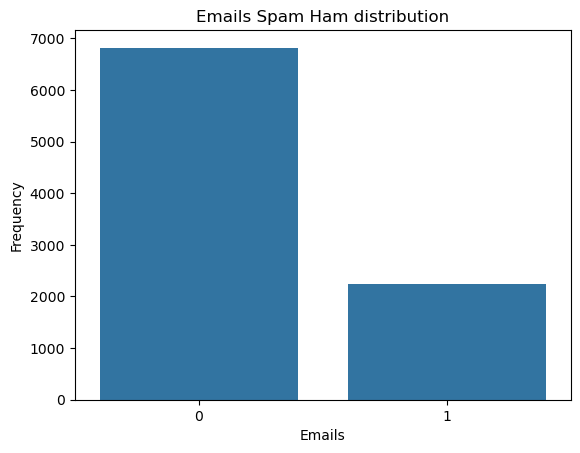

In [10]:
sns.countplot(x=df["is_phishing"])
plt.xlabel("Emails")
plt.ylabel("Frequency")
plt.title("Emails Spam Ham distribution")
plt.show()

In [3]:
text_column = ["subject", "sender", "body"]
X_text = df[text_column]
y = df[is_phishing]

vectorizers = {}
X_tfidf = {}

for col in text_columns:
    vectorizers[col] = TfidVectorizer(stop_words = "english", max features = 100) #Creates a vectorizer for each column, ignore common english words using stop words, and uses the top 100 words
    X_tfidf[col] = vectorizers[col].fit_transform(X[col]) #transforms each column into numerical form


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, training_size=0.8)

Missing values in 'is_phishing': 0


In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("boss_email_dataset_encode_change_after_filter.csv")

# Step 1: Vectorize the 'subject' column using TF-IDF
tfidf_subject = TfidfVectorizer(max_features=1000, stop_words='english')
subject_vectors = tfidf_subject.fit_transform(df['subject']).toarray()

# Step 2: Vectorize the 'body' column using TF-IDF
tfidf_body = TfidfVectorizer(max_features=1000, stop_words='english')
body_vectors = tfidf_body.fit_transform(df['body']).toarray()

# Step 3: Encode the 'sender' column using One-Hot Encoding
encoder = OneHotEncoder()
sender_vectors = encoder.fit_transform(df[['sender']]).toarray()

#Join all 3 fields together
X = np.hstack([subject_vectors, body_vectors, sender_vectors])
y = df['is_phishing']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

param_grid = {
    'n_estimators': [200, 300],          # Number of trees in the forest
    'max_depth': [10, 15],                # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5],            # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', 0.3],    # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                # Whether to use bootstrap samples
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=param_grid,
    cv=2,                              # 2-fold cross-validation
    scoring='accuracy',                # Use accuracy as the metric to evaluate
    n_jobs=-1,                         # Use all available CPU cores
    verbose=2
)

# Measure the time taken for GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)  # Fit the model
end_time = time.time()

# Calculate and print the time taken
print(f"GridSearchCV took {(end_time - start_time) / 60:.2f} minutes.")

# Get the best model and print the best parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions and evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")


Fitting 2 folds for each of 216 candidates, totalling 432 fits
GridSearchCV took 57.08 minutes.
Best Parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 97.63%


# *Default parameters for NB,RF,LR AND GB. Feed all 3 fields subject body and sender column to get Y, but it vectorizes the entire dataset, which might not be a good practice*

In [9]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("boss_email_dataset_encode_change_after_filter.csv")

# Step 1: Vectorize the 'subject' column using TF-IDF
tfidf_subject = TfidfVectorizer(max_features=1000, stop_words='english')
subject_vectors = tfidf_subject.fit_transform(df['subject']).toarray()

# Step 2: Vectorize the 'body' column using TF-IDF
tfidf_body = TfidfVectorizer(max_features=1000, stop_words='english')
body_vectors = tfidf_body.fit_transform(df['body']).toarray()

# Step 3: Encode the 'sender' column using One-Hot Encoding
encoder = OneHotEncoder()
sender_vectors = encoder.fit_transform(df[['sender']]).toarray()

#Join all 3 fields together
X = np.hstack([subject_vectors, body_vectors, sender_vectors])
y = df['is_phishing']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)


# ------------------------ Logistic regression ------------------------
log_reg = LogisticRegression(max_iter=200)  # Start with 200 iterations
log_reg.fit(X_train, y_train)

# Make predictions and evaluate the Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2%}")

# ------------------------ Gradient Boosting ------------------------
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=100)  # Default parameters
gb_model.fit(X_train, y_train)

# Make predictions and evaluate the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nGradient Boosting Accuracy: {accuracy_gb:.2%}")

# ------------------------ Random Forest ------------------------
# Step 8: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=100)  # Default parameters
rf_model.fit(X_train, y_train)

# Step 9: Make predictions and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2%}")

# ------------------------ Naive Bayes ------------------------
# Initialize and train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions and evaluate the Naive Bayes model
y_pred_nb = naive_bayes_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nNaive Bayes Accuracy: {accuracy_nb:.2%}")

Logistic Regression Accuracy: 98.62%

Gradient Boosting Accuracy: 96.52%

Random Forest Accuracy: 98.01%

Naive Bayes Accuracy: 96.52%


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the dataset
df = pd.read_csv("boss_email_dataset_encode_change_after_filter.csv")

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(df[['subject', 'body', 'sender']], df['is_phishing'], test_size=0.2, random_state=100)

# Step 1: Vectorize the 'subject' column using TF-IDF, we do it seperately for test and train, to prevent data leakage, and prevent model from learning
tfidf_subject = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_subject = tfidf_subject.fit_transform(X_train['subject']).toarray()
X_test_subject = tfidf_subject.transform(X_test['subject']).toarray()

# Step 2: Vectorize the 'body' column using TF-IDF
tfidf_body = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_body = tfidf_body.fit_transform(X_train['body']).toarray()
X_test_body = tfidf_body.transform(X_test['body']).toarray()

# Step 3: Encode the 'sender' column using One-Hot Encoding, similarly, we do it seperately for test and train. If theres a new sender in testing set, the handle_unkown will ignore it
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_sender = encoder.fit_transform(X_train[['sender']]).toarray()
X_test_sender = encoder.transform(X_test[['sender']]).toarray()

# Combine transformed features
X_train_combined = np.hstack([X_train_subject, X_train_body, X_train_sender])
X_test_combined = np.hstack([X_test_subject, X_test_body, X_test_sender])

def print_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n", cm)

# ------------------------ Logistic regression ------------------------
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_combined, y_train) #Where The model learns from the training set 
y_pred_log_reg = log_reg.predict(X_test_combined) #model predicts Y_test using the x_test set
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2%}")
print_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")

# ------------------------ Gradient Boosting ------------------------
gb_model = GradientBoostingClassifier(random_state=100)
gb_model.fit(X_train_combined, y_train)
y_pred_gb = gb_model.predict(X_test_combined)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nGradient Boosting Accuracy: {accuracy_gb:.2%}")
print_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

# ------------------------ Random Forest ------------------------
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train_combined, y_train)
y_pred_rf = rf_model.predict(X_test_combined)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2%}")
print_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# ------------------------ Naive Bayes ------------------------
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_combined, y_train)
y_pred_nb = naive_bayes_model.predict(X_test_combined)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nNaive Bayes Accuracy: {accuracy_nb:.2%}")
print_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")


Logistic Regression Accuracy: 98.68%

Confusion Matrix for Logistic Regression:
 [[1361    8]
 [  16  427]]

Gradient Boosting Accuracy: 96.63%

Confusion Matrix for Gradient Boosting:
 [[1357   12]
 [  49  394]]

Random Forest Accuracy: 98.68%

Confusion Matrix for Random Forest:
 [[1367    2]
 [  22  421]]

Naive Bayes Accuracy: 96.30%

Confusion Matrix for Naive Bayes:
 [[1328   41]
 [  26  417]]


In [ ]:
#Uses gridsearchCV for automated model and hyperparameter tuning at the same time

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("boss_email_dataset_encode_change_after_filter.csv")

# Define features and target
X = df[['subject', 'body', 'sender']]
y = df['is_phishing']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Define transformers
subject_transformer = TfidfVectorizer(max_features=1000, stop_words='english')
body_transformer = TfidfVectorizer(max_features=1000, stop_words='english')
sender_transformer = OneHotEncoder()

# Column transformer to preprocess features
preprocessor = ColumnTransformer(
    transformers=[
        ('subject', subject_transformer, 'subject'),
        ('body', body_transformer, 'body'),
        ('sender', sender_transformer, 'sender')
    ]
)

# Define a pipeline template
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use the preprocessor defined earlier
    ('classifier', LogisticRegression())  # Placeholder model, will be replaced by GridSearchCV
])

# Define a parameter grid
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=200)],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [RandomForestClassifier(random_state=100)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=100)],
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    },
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 1.0]
    }
]

# Use GridSearchCV to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best model and parameters
print(f"Best Model: {grid_search.best_estimator_}")
print(f"Best Accuracy from Cross-Validation: {grid_search.best_score_:.2%}")

# Test set performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Model: {accuracy:.2%}")
